# 1. Problem definition
How well can we predict avocado prices based on data?

# 2. Data
The data is dowloaded from kaggle: https://www.kaggle.com/neuromusic/avocado-prices?select=avocado.csv

# 3. Data dictionary:
- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

## 4. Get tools we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## 5. Exploring data

In [2]:
# import data
df = pd.read_csv('avocado.csv',index_col=[0])
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Size of data
df.shape

(18249, 13)

In [4]:
# type of data
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [5]:
# Chceck number of missing data
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

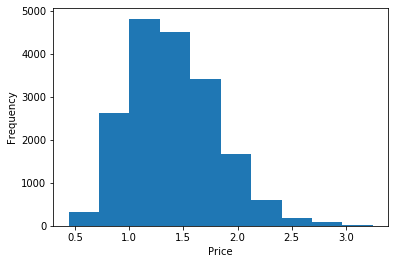

In [6]:
df.AveragePrice.plot.hist()
plt.xlabel('Price');

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

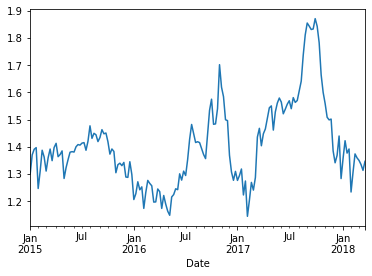

In [8]:
# Plot average price with date column
fig, ax = plt.subplots()
byDate=df.groupby('Date').mean()
byDate['AveragePrice'].plot();

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64

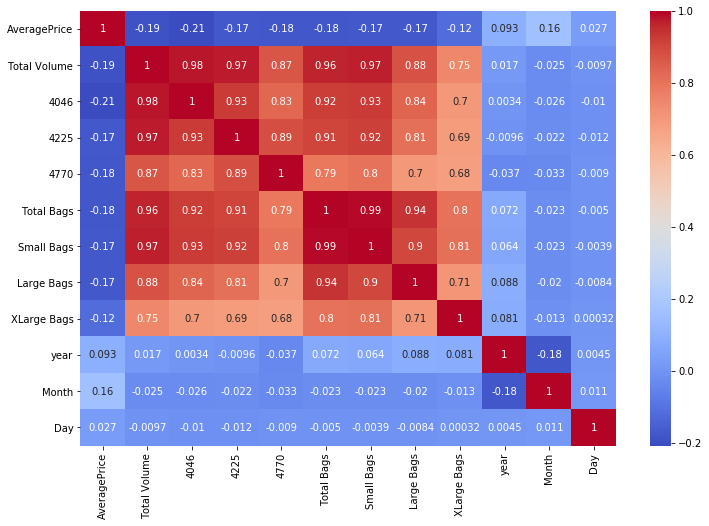

In [10]:
# Relationship betweeen features
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [11]:
# How many regions?
df.region.value_counts()

Albany                 338
Pittsburgh             338
NewYork                338
Denver                 338
Louisville             338
SanFrancisco           338
TotalUS                338
Northeast              338
Indianapolis           338
BaltimoreWashington    338
NorthernNewEngland     338
HartfordSpringfield    338
Boston                 338
Chicago                338
California             338
Columbus               338
Nashville              338
BuffaloRochester       338
Sacramento             338
StLouis                338
Plains                 338
Portland               338
Midsouth               338
Spokane                338
Detroit                338
Atlanta                338
Philadelphia           338
SanDiego               338
Tampa                  338
West                   338
NewOrleansMobile       338
SouthCentral           338
RaleighGreensboro      338
CincinnatiDayton       338
RichmondNorfolk        338
Houston                338
Boise                  338
P

## 6. Modeling data

In [12]:
df.drop('Date', axis=1, inplace=True)

In [13]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
Day               int64
dtype: object

In [14]:
# We need to strings to categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = df[label].astype('category')

In [15]:
# Now we need to convert category into numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] =  pd.Categorical(content).codes+1

In [16]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type               int8
year              int64
region             int8
Month             int64
Day               int64
dtype: object

#### Now we can start building our model

In [17]:
# Import some tools we need
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [18]:
# Set random seed
np.random.seed(42)

# Split data
X = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

# Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,1,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,1,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,1,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,1,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,1,11,29


### Linear Regression 

In [20]:
lr = LinearRegression()

# Fit our model
lr.fit(X_train, y_train)

# Predict model
lr_pred = lr.predict(X_test)

# Score model

def results(model, model_prediction):
    '''
    We build there a function that will show us results 
    '''
    
    print(f"MAE: {mean_absolute_error(y_test, model_prediction)}")
    print(f"MSE: {mean_squared_error(y_test, model_prediction)}")
    print(f"MSLE: {mean_squared_log_error(y_test, model_prediction)}")

In [21]:
print('Linear Regression')
results(lr, lr_pred)

Linear Regression
MAE: 0.23295546197767622
MSE: 0.09101317012327867
MSLE: 0.014920096647988464


That doesn't look bad, let's check this on plot

In [22]:
def plot_results(model_predict):
    
    plt.scatter(y_test, model_predict)
    plt.title('Compare predict and y_test data')
    plt.xlabel('Y test')
    plt.ylabel('X predicted');

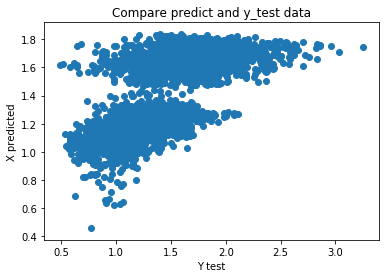

In [23]:
plot_results(lr_pred)

We don't have straight line so our model is not so good

### Decision Tree Regression

In [24]:
# Fit our new model
dtr = DecisionTreeRegressor().fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

# Get results from our function we build earlier
print('DecisionTreeRegressor')
results(dtr, dtr_pred)

DecisionTreeRegressor
MAE: 0.1210794520547945
MSE: 0.03475731506849315
MSLE: 0.005476147081743272


Okey, results are smaller so model should be better, but let's see this on plot

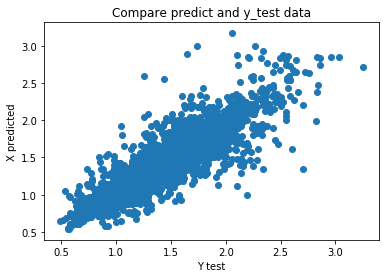

In [25]:
plot_results(dtr_pred)

It looks better! Let's try our last model

### Random Forest Regressor

In [26]:
# Fit our new model
rfr = RandomForestRegressor().fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

# Get results
print('RandomForestRegressor')
results(rfr, rfr_pred)

RandomForestRegressor
MAE: 0.09278906849315066
MSE: 0.01752518221643835
MSLE: 0.0027970531451921446


It looks even better!

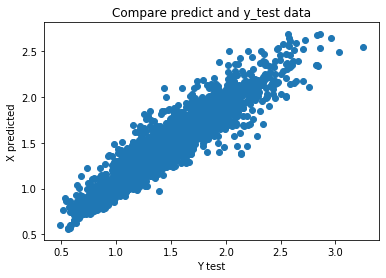

In [27]:
# Plot results
plot_results(rfr_pred)

####  We can easly notice that RandomForestRegressor has the best results, but we will try to improve them :D

### RandomizedCV

In [28]:
%%time
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.1min finished


Wall time: 8min 36s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [29]:
# Check best params
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [35]:
# Get results from our new model, hope they will be better!
ideal_model = RandomForestRegressor(n_estimators= 80,
                                     min_samples_split= 6,
                                     min_samples_leaf=1,
                                     max_features= 'auto',
                                     max_depth= None)
ideal_model.fit(X_train, y_train)

ideal_pred = ideal_model.predict(X_test)

results(ideal_model, ideal_pred)

MAE: 0.09504835341921318
MSE: 0.01842077999384079
MSLE: 0.0029328539322133235


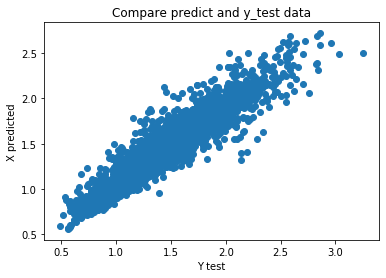

In [36]:
plot_results(ideal_pred)

### It doesn't look better, so rfr_model is the best

In [37]:
rfr.feature_importances_

array([0.0324373 , 0.08960916, 0.07599333, 0.03396007, 0.03449333,
       0.04101405, 0.09247053, 0.00751747, 0.38309244, 0.06495747,
       0.04315106, 0.08743857, 0.01386523])

In [38]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

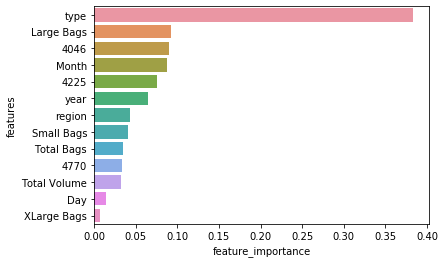

In [39]:
plot_features(X_train.columns, rfr.feature_importances_)

###  We can notice that 'type' is the most important column in our model

## 7. Save our model

In [41]:
from joblib import dump, load

dump(rfr, 'avocado_price_model.joblib')

['avocado_price_model.joblib']